In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
%matplotlib inline
import warnings
import datetime
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


No missing data were found to our dataset.

In [6]:
df.isnull().any()# check for missing data

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

After extracting all useful information from datetime, i.e. 'year', 'month', 'weekday' and 'hour' we are going 
to discard it.

In [7]:
datetime_t = pd.to_datetime(df.loc[:,'datetime'])
df['year'] = datetime_t.dt.year
df['month'] = datetime_t.dt.month
df['weekday'] = datetime_t.dt.weekday
df['hour'] = datetime_t.dt.hour
df.drop(['datetime'], axis=1, inplace = True)
df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


## Visualization
From the analysis of many users rent bikes on each day of the week, it becomes clear that the usage is different on work days and on weekends. On Sundays and Saturdays people use more the bikes during afternoon, while during work days, bikes are mostly used at peak times, i.e. morning and afternoon hours related to when people go to and come from work.

[Text(0.5, 1.0, 'Bike Rentals During Weekdays and Weekends')]

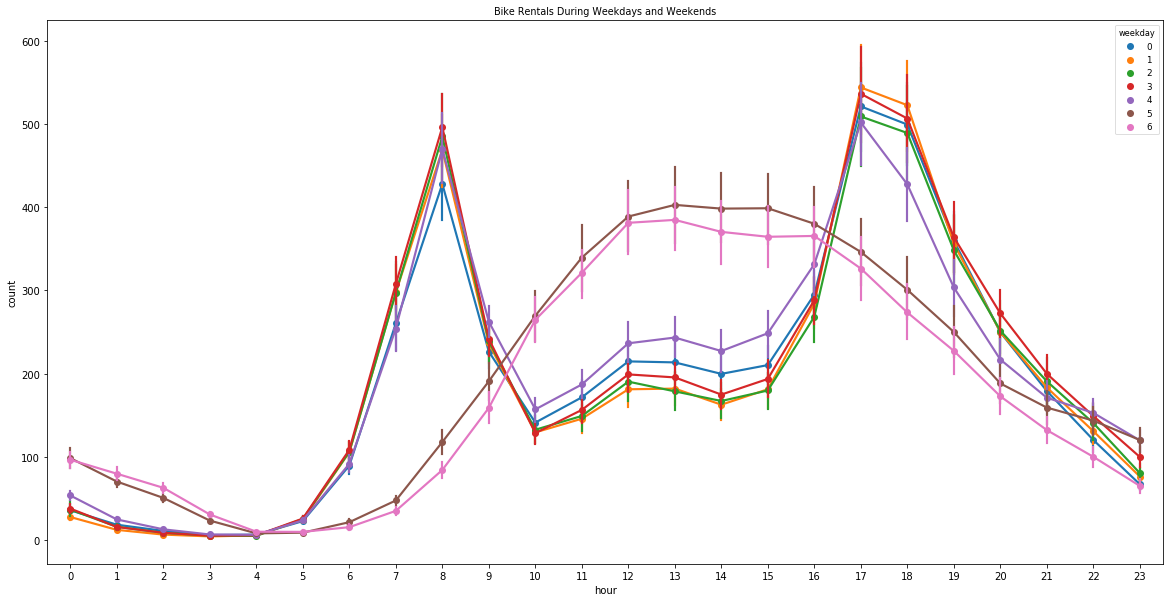

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_context("paper")
sns.pointplot(data=df[['hour','count','weekday']],x='hour', y='count',hue='weekday', ax=ax)
ax.set(title="Bike Rentals During Weekdays and Weekends")

Overall bike use during the year 2011 was systematically lower than year 2012.

[Text(0.5, 1.0, 'Bike Rentals During Years 2011 and 2012')]

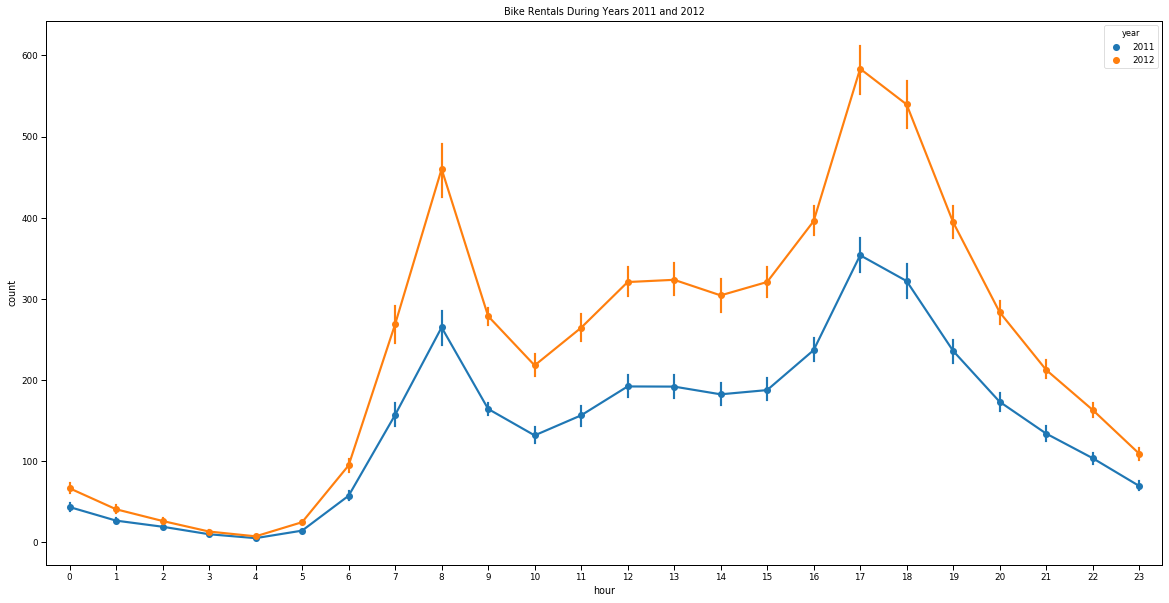

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_context("paper")
sns.pointplot(data=df[['hour','count','year']],x='hour', y='count',hue='year', ax=ax)
ax.set(title="Bike Rentals During Years 2011 and 2012")

Bike use during holidays is distributed different than during non-holidays. The bike use during holidays shows 
similar trends like bike use at weekends (a pick early in the afternoon) but also exhibits a second pick later on.

[Text(0.5, 1.0, 'Bike Rentals During Holidays')]

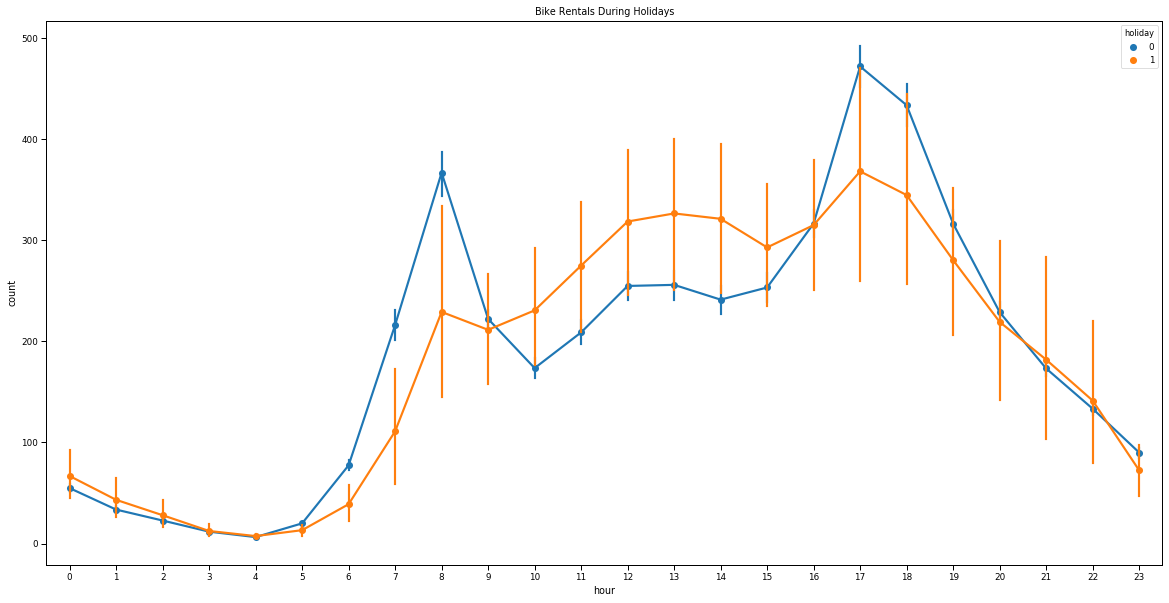

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set_context("paper")
sns.pointplot(data=df[['hour','count','holiday']],x='hour', y='count',hue='holiday', ax=ax)
ax.set(title="Bike Rentals During Holidays")

Casual users tend to use the bikes during afternoon during the whole week, while registered users follow the first graph pattern (leisure on weekends and going to work on weekdays).

[Text(0.5, 1.0, 'Bike Rentals by Registered Users')]

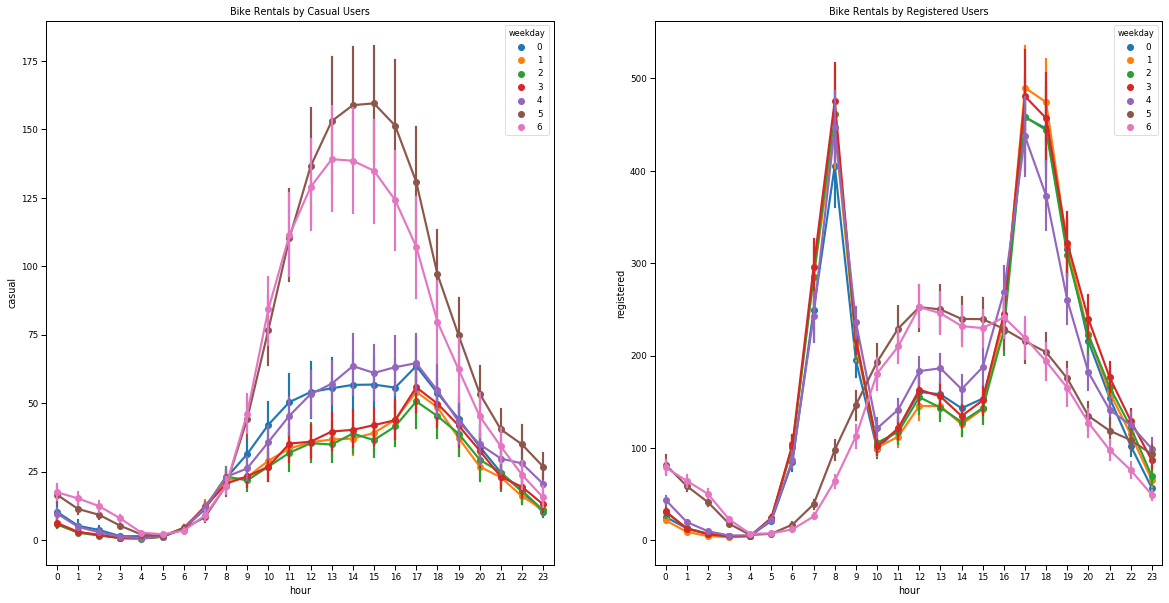

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.pointplot(data=df[['hour','casual','weekday']],x='hour', y='casual',hue='weekday', ax=ax1)
ax1.set(title="Bike Rentals by Casual Users")
sns.pointplot(data=df[['hour','registered','weekday']],x='hour', y='registered',hue='weekday', ax=ax2)
ax2.set(title="Bike Rentals by Registered Users")

In [12]:
df.groupby('season').mean()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,weekday,hour
season,,,,,,,,,,,,,,
1,0.026433,0.680566,1.424423,12.530491,15.228956,56.297841,14.636978,15.489576,100.853686,116.343261,2011.507446,2.006329,3.051750,11.642591
2,0.017563,0.692645,1.422978,22.823483,26.647098,60.852909,13.405607,47.446762,167.804610,215.251372,2011.499817,5.001098,3.011343,11.508965
3,0.035126,0.675082,1.366630,28.789111,32.540783,64.123674,11.508862,52.220271,182.196853,234.417124,2011.500549,7.998902,3.001829,11.510428
4,0.035113,0.675201,1.459766,16.649239,20.059909,66.173738,11.678147,28.580834,170.407462,198.988296,2011.500000,11.000366,2.991587,11.506218


Regarding weather and season, I observe that more bikes are rented when it’s sunny and in the fall, respectively, whereas people tend to use less the bikes during spring time.

[Text(0.5, 1.0, 'Bike Rentals Based on Seasons')]

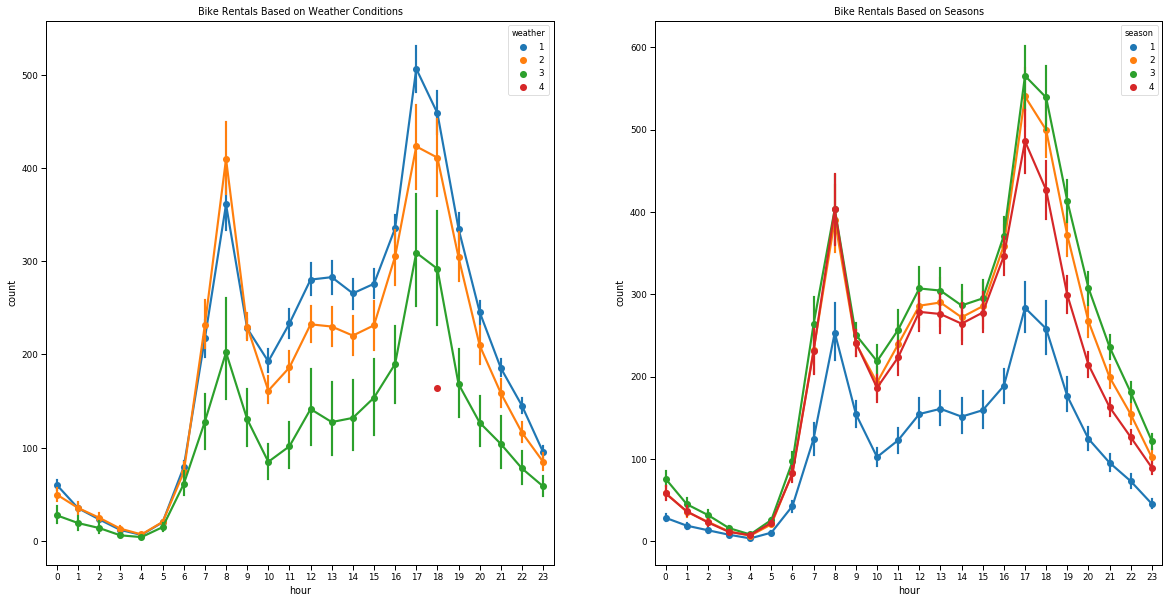

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,10))
sns.pointplot(data=df[['hour','count','weather']],x='hour', y='count', hue='weather', ax=ax1)
ax1.set(title="Bike Rentals Based on Weather Conditions")
sns.pointplot(data=df[['hour','count','season']],x='hour', y='count', hue='season', ax=ax2)
ax2.set(title="Bike Rentals Based on Seasons")

Checking for correlation between the data, I observe that 'temp' and 'atemp' appear as highly correlated variables (0.98). To refrain from multicollinearity issues, as a next step, I will remove 'atemp' from the dataset. The high correlation of 'registered' or 'casual' user with 'count', means that these features would be very helpful for modelling. However, we would refrain to use 'registerd' or 'casual' as features for our model as they would introduce data leakage in our model: we cannot know a priori whether a 'registered' or a 'casual' user will come along to rent a bike, thus we would proceed with removing these two features.

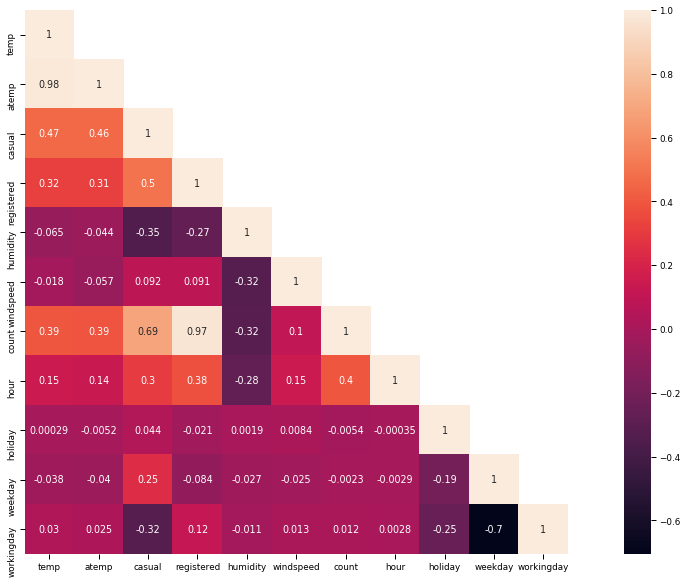

In [14]:
data_correlation = df[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count', 'hour', 'holiday', 'weekday', 'workingday']].corr()
mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(20,10))
sns.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

In [15]:
data = df.drop(['atemp', 'casual', 'registered'], axis=1)

The 'holiday','weekday' and 'registered' feature appear to be low correlated with 'count'. Judging just from the
correlation numbers one would have been tempted to remove them. However, as we can see from the regression plots,
although the linear fit cannot capture the relation between these features and count as it is not linear, there 
are definetely correlated and would not make sense to remove them from our model as we will lose useful information.

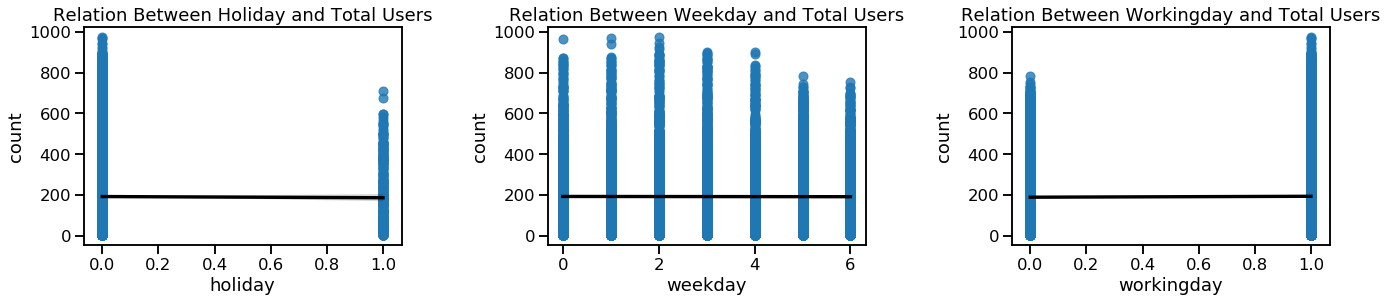

In [16]:
sns.set_context("talk")
fig, (ax0,ax1,ax2) = plt.subplots(ncols=3, figsize=(20,5))
#fig,axes = plt.subplots(1,3, figsize=(15,3))
sns.regplot(x='holiday', y='count', data=df[['holiday','count']], ax = ax0, line_kws={'color':'black'})
ax0.set(title="Relation Between Holiday and Total Users")
sns.regplot(x='weekday', y='count', data=df[['weekday','count']] , ax = ax1,line_kws={'color':'black'})
ax1.set(title="Relation Between Weekday and Total Users")
sns.regplot(x='workingday', y='count', data=df[['workingday','count']], ax = ax2,line_kws={'color':'black'})
ax2.set(title="Relation Between Workingday and Total Users")

fig.tight_layout(pad=2.0)

From the plots below, I observe a positive correlation between temperature and usage for most of the temperature range, and a linear fit isn’t far from the best-fit curve. This should intuitively make sense, as people are not likely to bike outside in cold weather. For the maximum temperatures, which seem to be a small subset of the data, there is a dip in this curve. Once again, this should make sense as users may also be discouraged to bike when it’s too hot outside. Regarding humidity, there seems to be a negative correlation between the humidity and the usage rate, with a linear fit being very close to the best curve fit for all of the data. This could be explained by the fact that higher humidity is correlated with higher chances of rainfall. 

[Text(0.5, 1.0, 'Relation Between Humidity and Total Users')]

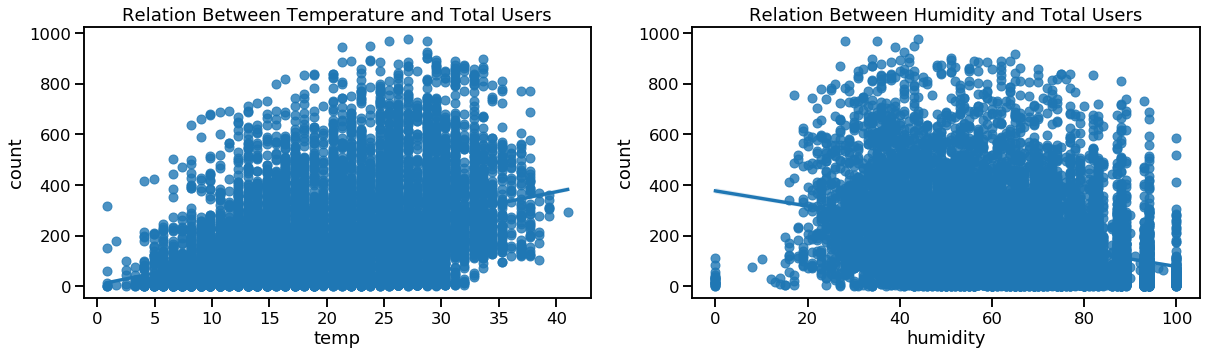

In [17]:
sns.set_context("talk")
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1)
ax1.set(title="Relation Between Temperature and Total Users")
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2)
ax2.set(title="Relation Between Humidity and Total Users")

## Outliers and Variable Trasnformation

Checking for outliers, 'count' variable contains lots of outlier data points that skew the distribution towards right (as there are more data points beyond Outer Quartile Limit). In addition to that, the fit for the count as a function of hour is far from linear, demonstrating lowest usage is late at night (with the minimum between 4–5 am) and the peaks are during 8–9 am and 5–7 pm, which must correspond to rush hour. 

[Text(0.5, 1.0, 'Boxplot for Hour of the Day')]

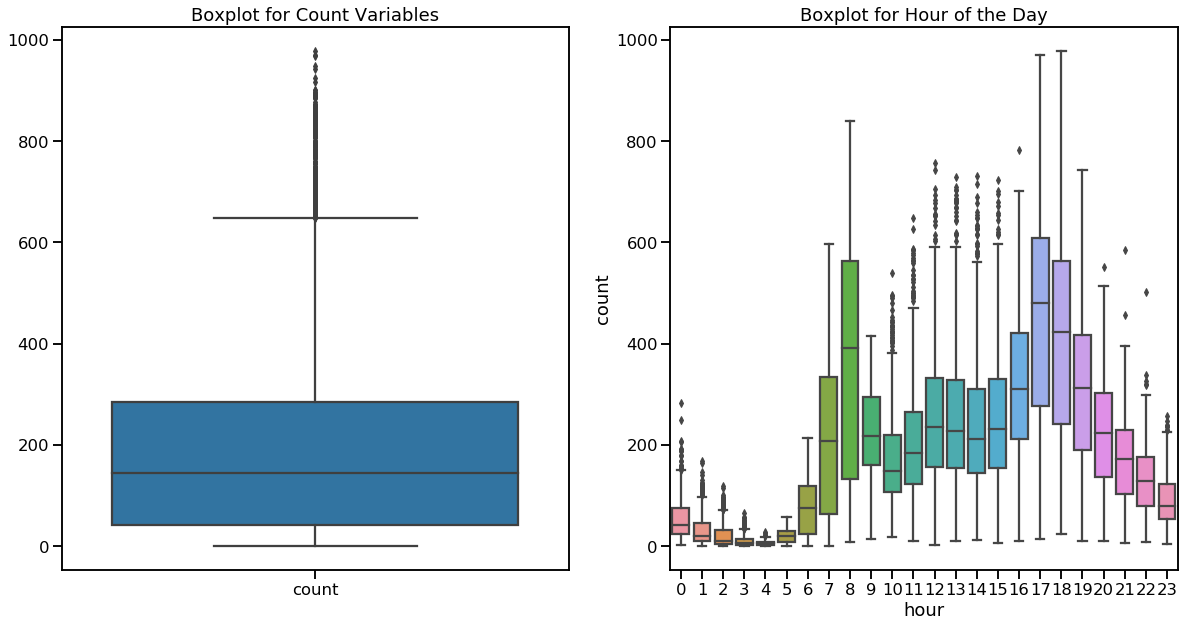

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))
sns.boxplot(data=df[['count']], ax=ax1)
ax1.set(title="Boxplot for Count Variables")
sns.boxplot(x=df['hour'],y=df['count'], ax=ax2)
ax2.set(title="Boxplot for Hour of the Day")

To account for the skewed distribution, I take a log transformation on 'count' after removing the outliers. The distribution is already much closer to a normal one.

[Text(0.5, 1, 'Theoretical quantiles')]

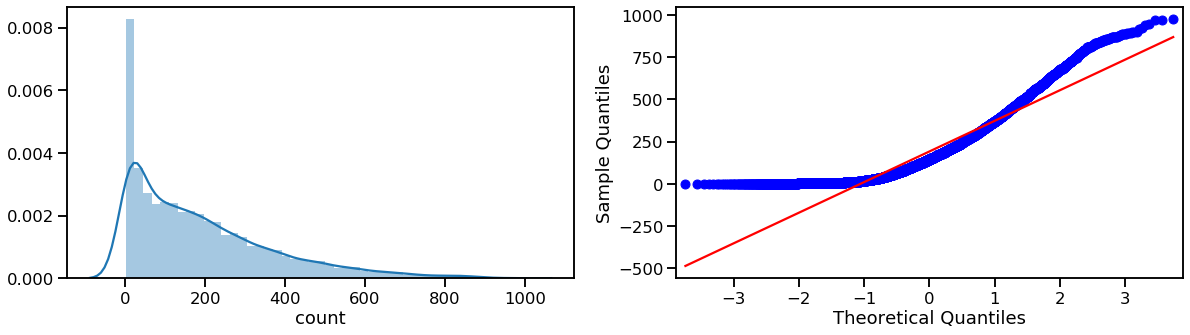

In [19]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(data['count'], ax=ax1)
ax.set(title="Distribution before log of count")
qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [20]:
import math
data['count'] = data['count'].transform(lambda x: math.log(x))

[Text(0.5, 1, 'Theoretical quantiles')]

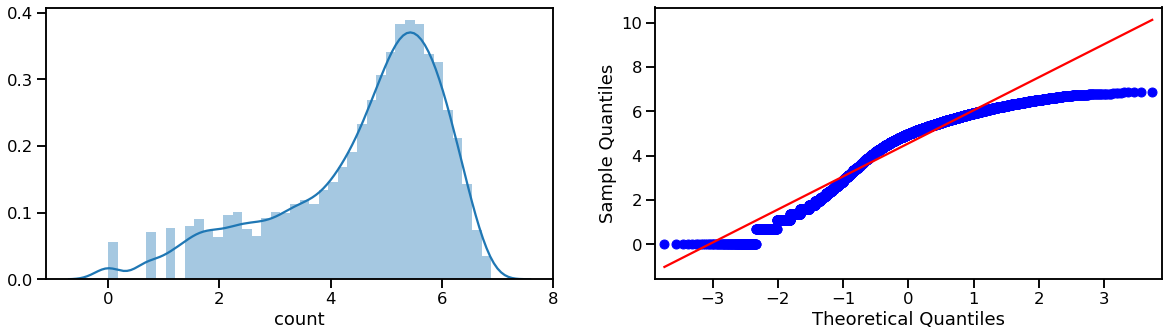

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(data['count'], ax=ax1)
ax.set(title="Distribution after log of count")
qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

Next, I change the categorical variables that are interpreted as numerical, into categorical ones and apply one-hot-encoding to convert them into binary categories.

In [22]:
data_dummy = data

def dummify_dataset(df2, column):       
    df2 = pd.concat([df2, pd.get_dummies(df2[column], prefix=column, drop_first=True)],axis=1)
    df2 = df2.drop([column], axis=1)
    return df2


columns_to_dummify = ['season', 'month', 'hour','year', 'holiday', 'weekday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
    
data_dummy.head(1)

,workingday,temp,humidity,windspeed,count,season_2,season_3,season_4,month_2,month_3,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weather_2,weather_3,weather_4
0,0,9.84,81,0.0,2.772589,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Choosing the Algorithm and Building the Model
As the data is not normally distributed, I can apply either a non-linear transformation to try to fix this issue, or use a nonparametric algorithm as shown below. 

In [23]:
from sklearn.model_selection import train_test_split

y = data_dummy['count']
X = data_dummy.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor 

models = [LinearRegression(),
          Ridge(),
          Lasso(),
          DecisionTreeRegressor(), 
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())
    
for model in models:
    test_algorithms(model)

-0.3826867743565489
-0.38289369982106886
-1.7362413084371098
-0.4560946715057243
-0.30623977023522586
-0.23305154755389443
-0.2622840743729372


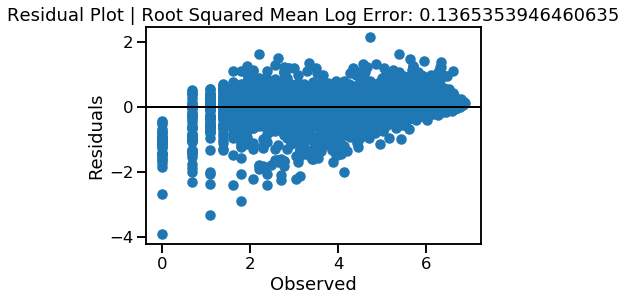

workingday     0.431012
temp           6.665458
humidity      16.171692
windspeed      6.435031
season_2       0.374966
season_3       0.375924
season_4       0.377829
month_2        0.149858
month_3        0.155344
month_4        0.147559
month_5        0.155344
month_6        0.155344
month_7        0.150317
month_8        0.158298
month_9        0.151233
month_10       0.155344
month_11       0.155116
month_12       0.152606
hour_1         0.080395
hour_2         0.081901
hour_3         0.077123
hour_4         0.078886
hour_5         0.081148
hour_6         0.080395
hour_7         0.078383
hour_8         0.077879
hour_9         0.081399
hour_10        0.080646
hour_11        0.078886
hour_12        0.079390
hour_13        0.077627
hour_14        0.077375
hour_15        0.078886
hour_16        0.079893
hour_17        0.083905
hour_18        0.084155
hour_19        0.078131
hour_20        0.077123
hour_21        0.076618
hour_22        0.082152
hour_23        0.081650
year_2012      0

In [25]:
from sklearn.metrics import mean_squared_log_error
 
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print()

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()
X_train.mad()

Hyperparameter selection through 3-fold cross-validation: RMSE

Best parameter: {'n_estimators': 300}
Best score: 0.50


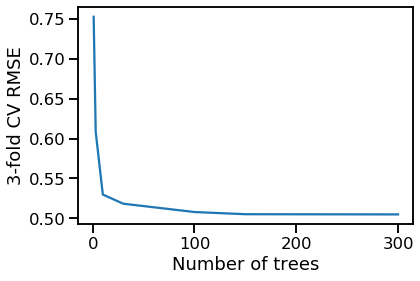

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[1,3,10,30,100,150,300]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train,y_train)
plt.figure()
plt.plot(list(param_grid.values())[0],(-1*grid_rf.cv_results_['mean_test_score'])**0.5)
plt.xlabel('Number of trees')
plt.ylabel('3-fold CV RMSE')
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

In [27]:
param_grid = {'n_estimators':[1,3,10,30,100,150,300],'max_depth':[1,3,5,7,9]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train,y_train)
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 9, 'n_estimators': 150}
Best score: 0.68


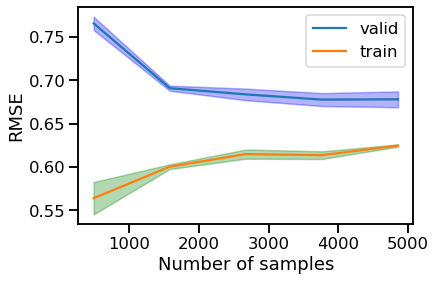

In [28]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(RandomForestRegressor(max_depth=9, n_estimators=300), X_train, y_train, cv=3, scoring='neg_mean_squared_error')

train_scores = (-1*train_scores)**0.5
valid_scores = (-1*valid_scores)**0.5
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes,valid_scores_mean,label='valid')
plt.plot(train_sizes,train_scores_mean,label='train')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.3, color="b")
plt.xlabel('Number of samples')
plt.ylabel('RMSE')
plt.legend()

We observe that the bike usage is predominantly affected by the hour followed by the temperature and whether is a working day or not. 

Text(0.5, 0, 'relative importance')

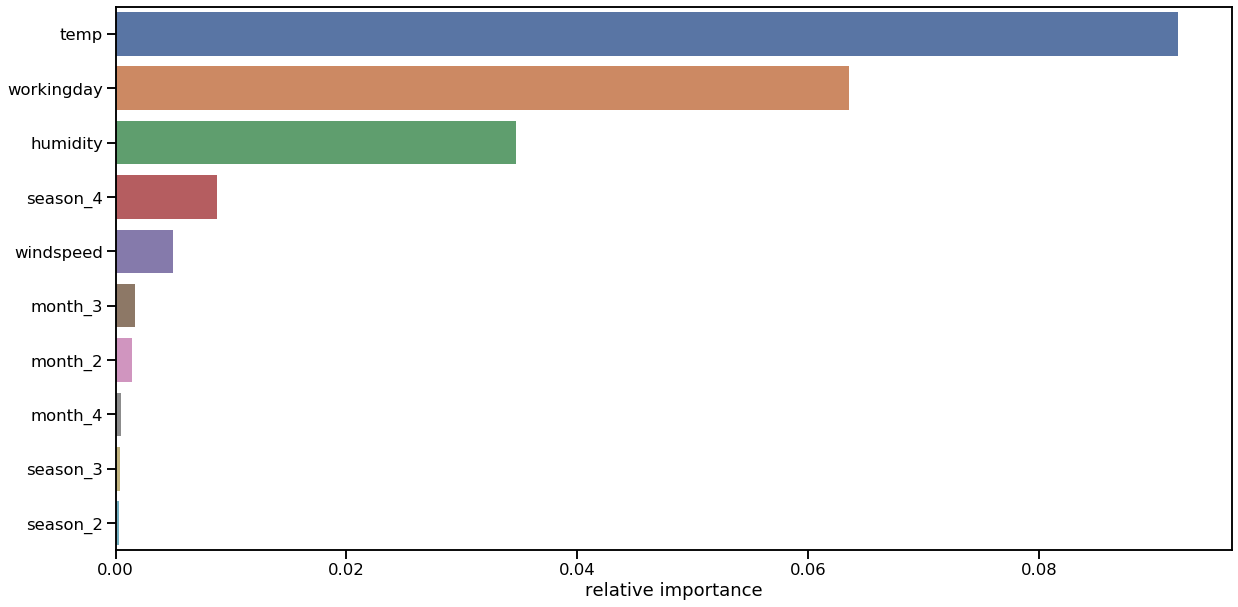

In [29]:
rf = RandomForestRegressor(max_depth=9, n_estimators=300).fit(X_train,y_train)
f_im = rf.feature_importances_.round(7)
ser_rank = pd.Series(f_im[0:10],index=X.columns[0:10]).sort_values(ascending=False)


fig, ax = plt.subplots(figsize=(20,10))
sns.set_context("paper")
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')